O treinamento do modelo se deu sobre um subconjunto dos dados que foi anotado manualmente.  
O conjunto anotado pode ser encontrado em `sample.csv`.

A amostragem foi feita através do script `sample.py`.

In [1]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def stratified_sample(df, col, n_per_class):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(min(len(x), n_per_class)))

In [3]:
annotated_data = pd.read_csv('sample.csv')
annotated_data.head()

,TITLE,SMARTPHONE
0,Capa Samsung Galaxy S5 Mini Pc Couro Branco,0
1,Cabo Usb Retrátil 3 Adaptadores Preto - Muvit,0
2,Celular Samsung Galaxy A8 Plus 2018 Sm-a730f 6...,1
3,Lousa Magnética Grande Em Formato De Vaca Suelen,0
4,Aplique Madeira E Papel Placa Pinguim Com Colh...,0


# Extração de features

A extração de *features* foi feita através de expressões regulares:

Se o título de uma instância corresponder a uma regex em qualquer ponto, associa-se o valor 1 ao atributo da referente à mesma.  
Caso contrário, 0 é atribuído.

In [4]:
patterns = [
    r'smart', # contém "smart"
    r'(?:ph|f)one', # contém "fone" ou "phone"
    r'\bcelular\b', # contém a palavra "celular"
    r'\bbumper\b', # contém a palavra "bumper"
    r'\b[a-z]\d\b', # contém, p.e., "G5", "S9", ...
    r'\bkit\b', # contém a palavra "kit"
    r'\b(?:capa|case)\b', # contém a palavra "capa" ou "case"
    r'\bpara\b' # contém a palavra "para" (p.e. "antena para celular")
]

patterns_re = [re.compile(pat, re.IGNORECASE) for pat in patterns]

# Usado para nomear as colunas do DataFrame
attr_names = ['smart', 'phone', 'celular', 'bumper', 'letra_num', 'kit', 'capa', 'para']

In [5]:
# Transforma um título em uma lista de atributos
def get_attributes(title):
    title_attributes = []
    for pattern in patterns_re:
        if pattern.search(title) is None:
            title_attributes.append(0)
        else:
            title_attributes.append(1)
    return title_attributes

## Transformação dos dados

In [6]:
# Transforma as linhas de um DataFrame nos atributos correspondentes ao título
def get_row_attributes(dataframe):
    attributes = []
    for i in dataframe.index:
        row_attr = get_attributes(dataframe.loc[i].TITLE)
        attributes.append(row_attr)
    attr_df = pd.DataFrame(attributes)
    attr_df.columns = [f're_{re_name}' for re_name in attr_names]
    attr_df.insert(0, 'TITLE', dataframe.TITLE)
    return attr_df

In [7]:
annotated_attributes = get_row_attributes(annotated_data)
annotated_attributes['SMARTPHONE'] = annotated_data.SMARTPHONE

stratified_sample(annotated_attributes, 'SMARTPHONE', 5)

,TITLE,re_smart,re_phone,re_celular,re_bumper,re_letra_num,re_kit,re_capa,re_para,SMARTPHONE
89,Capa Samsung Galaxy Y Duos S6102 TPU Branco - ...,0,0,0,0,0,0,1,0,0
88,Fonte Carregador Ibm Lenovo Thinkpad X60 X60s ...,0,0,0,0,0,0,0,0,0
58,Ivy C Com 30 Gramas,0,0,0,0,0,0,0,0,0
143,Capa Nokia 520 TPU Gel Amarelo - IDEA,0,0,0,0,0,0,1,0,0
217,Colchão Solteiro De Espuma Ortobom Viscomemory...,0,0,0,0,0,0,0,0,0
290,"iPhone 8 Apple Plus com 64GB, Tela Retina HD d...",0,1,0,0,0,0,0,0,1
364,Lançamento Xiaomi Redmi S2 64gb Dual Sim Rom G...,0,0,0,0,1,0,0,0,1
436,Samsung Galaxy S8 5.8in 64gb Câmera 12mp+8mp A...,0,0,0,0,1,0,0,0,1
326,Celular Samsung J400m Galaxy J4 Prata 32 Gb,0,0,1,0,1,0,0,0,1
150,Samsung Galaxy S9+ S9 Plus Anatel 128gb Lacrad...,0,0,0,0,1,0,0,0,1


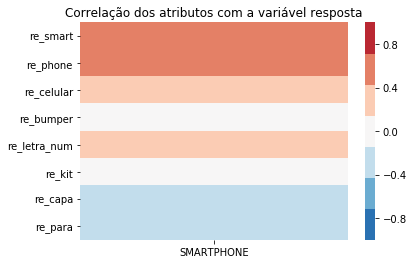

In [8]:
sns.heatmap(
    pd.DataFrame(annotated_attributes.iloc[:, 1:].corr().iloc[:-1, -1]),
    vmin=-1,
    vmax=+1,
    cmap=sns.color_palette('RdBu_r', 7))
plt.title('Correlação dos atributos com a variável resposta')
plt.show()

`bumper` e `kit` apresentam uma correlação não existente ou muito pequena com a variável resposta, portanto optei por tirar essas variáveis para reduzir o número de dimensões do problema.

Incluí essas variáveis pois apareciam com certa frequência na amostra anotada, mas parece que não são frequentes ou influentes o bastante para ter uma participação significativa nos resultados.

In [9]:
patterns = [
    r'smart', # contém "smart"
    r'(?:ph|f)one', # contém "fone" ou "phone"
    r'\bcelular\b', # contém a palavra "celular"
    # r'\bbumper\b', # contém a palavra "bumper"
    r'\b[a-z]\d\b', # contém, p.e., "G5", "S9", ...
    # r'\bkit\b', # contém a palavra "kit"
    r'\b(?:capa|case)\b', # contém a palavra "capa" ou "case"
    r'\bpara\b' # contém a palavra "para" (p.e. "antena para celular")
]

patterns_re = [re.compile(pat, re.IGNORECASE) for pat in patterns]

# Usado para nomear as colunas do DataFrame
attr_names = ['smart', 'phone', 'celular', 'letra_num', 'capa', 'para']

In [10]:
annotated_attributes = get_row_attributes(annotated_data)
annotated_attributes['SMARTPHONE'] = annotated_data.SMARTPHONE

stratified_sample(annotated_attributes, 'SMARTPHONE', 5)

,TITLE,re_smart,re_phone,re_celular,re_letra_num,re_capa,re_para,SMARTPHONE
267,Cooler Para Notebook Com 6 Níveis De Ajuste De...,0,0,0,0,0,1,0
432,Capa Lg G2 Mini Tpu Branco,0,0,0,1,1,0,0
284,Sebastian Professional Form Texture Maker Spra...,0,0,0,0,0,0,0
14,Capa Lg L3 Ii Tpu Roxo - Idea,0,0,0,1,1,0,0
104,Boneca Nolly Fala 60 Frases 32cm 124 - Super Toys,0,0,0,0,0,0,0
470,iPhone 8 Plus Apple RED Special Edition 64GB T...,0,1,0,0,0,0,1
433,Smartphone Motorola Moto G6 Play Dourado 32 Gb...,1,1,0,1,0,0,1
363,Smartphone Asus Zenfone 4 Selfie ZD553KL Gold ...,1,1,0,0,0,0,1
16,Samsung Galaxy S5 G900m 16gb Original Usado Ma...,0,0,0,1,0,0,1
415,Celular Iphone 5s 32gb Desbloqueado 100% Funci...,0,1,1,0,0,0,1


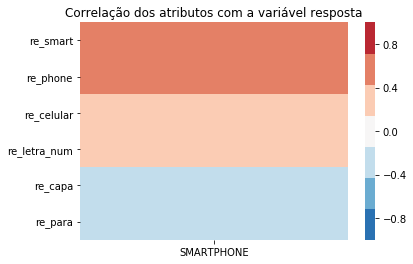

In [11]:
sns.heatmap(
    pd.DataFrame(annotated_attributes.iloc[:, 1:].corr().iloc[:-1, -1]),
    vmin=-1,
    vmax=+1,
    cmap=sns.color_palette('RdBu_r', 7))
plt.title('Correlação dos atributos com a variável resposta')
plt.show()

Aqui seria cabível uma análise de componentes principais ou análise de correspondência, mas por questões de tempo e simplicidade, deixei as demais colunas como estão.

# Avaliação de classificadores

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from scipy.stats import ttest_ind

Foi usada a área sob a curva ROC como medida de avaliação.  
Nesse caso, pode ser interessante ajustar as taxas de falsos e verdadeiros positivos.

Logo a curva ROC é uma representação apropriada para a performance de um classificador, pois sumariza a qualidade dos resultados do classificador sob um *threshold* bom.

Os classificadores testados foram o perceptron e a máquina de vetores de suporte com kernel polinomial de grau 3.  
Os resultados foram comparados com um teste T pareado para amostras independentes.

In [13]:
X = annotated_attributes.iloc[:, 1:-1].values
y = annotated_attributes.iloc[:, -1].values

In [14]:
def eval_clf(clf):
    roc_auc = cross_val_score(
        clf,
        X,
        y,
        scoring='roc_auc',
        cv=10
    )
    print(f'roc_auc: {np.mean(roc_auc):.2f} +- {np.std(roc_auc):.2f}\t'
         + f'min: {np.min(roc_auc):.2f}; max: {np.max(roc_auc):.2f}')
    return roc_auc

In [15]:
perceptron = Perceptron(max_iter=1e3)

print('Perceptron:')
roc_auc_per = eval_clf(perceptron)

Perceptron:
roc_auc: 0.96 +- 0.03	min: 0.89; max: 0.99


In [16]:
svc = SVC(gamma='auto', kernel='poly', degree=3) # sem limite de iterações

print('SVC (poly-3):')
roc_auc_svc = eval_clf(svc)

SVC (poly-3):
roc_auc: 0.97 +- 0.02	min: 0.93; max: 0.99


In [17]:
pvalue = ttest_ind(roc_auc_per, roc_auc_svc).pvalue
print(f'p-value: {pvalue:.3f} (5% de significância)')
if pvalue < 0.05:
    print('Há evidências de que os classificadores possuem performances diferentes')
else:
    print('Não há evidência de diferença de performance')

p-value: 0.625 (5% de significância)
Não há evidência de diferença de performance


## Seleção do classificador

Não houve evidências para dizer que um dos classificadores teve performance melhor.  
Logo, optei pela simplicidade do perceptron em detrimento do SVC.  
Entre os benefícios de optar pelo modelo simples, há a chance reduzida de overfitting.

# Transformação do dataset

## Treino do classificador escolhido

In [18]:
classifier = perceptron

X = annotated_attributes.iloc[:, 1:-1].values
y = annotated_attributes.iloc[:, -1].values
classifier.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000.0, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
data = pd.read_csv('data_estag_ds.tsv', sep='\t')
data.head()

,ID,TITLE
0,1041354,Acessório T - Jean Bag For Girls para DS Lite
1,1041782,Carrinho de Bebê Berço-Passeio - Pegasus Pink ...
2,1041834,Carrinho de Bebê para Gêmeos Berço-Passeio - T...
3,1042568,Car Center - Calesita
4,1042584,Donka Trem com Som - Calesita


In [20]:
data_attr = get_row_attributes(data)
data_attr.head()

,TITLE,re_smart,re_phone,re_celular,re_letra_num,re_capa,re_para
0,Acessório T - Jean Bag For Girls para DS Lite,0,0,0,0,0,1
1,Carrinho de Bebê Berço-Passeio - Pegasus Pink ...,0,0,0,0,0,0
2,Carrinho de Bebê para Gêmeos Berço-Passeio - T...,0,0,0,0,0,1
3,Car Center - Calesita,0,0,0,0,0,0
4,Donka Trem com Som - Calesita,0,0,0,0,0,0


In [21]:
predictions = classifier.predict(data_attr.iloc[:, 1:].values)

In [22]:
answers = pd.DataFrame()
answers['ID'] = data.ID
answers['TITLE'] = data.TITLE
answers['SMARTPHONE'] = pd.Series(predictions)

In [23]:
stratified_sample(answers, 'SMARTPHONE', 5)

,ID,TITLE,SMARTPHONE
1577,10637463,Capa Samsung Galaxy S3 Mini PC Transparente,0
601,10471854,Coifa Consul Parede Facilite Piramidal Aço Ino...,0
1514,10631886,Cabo Apple Cabo De Lightning Para Usb (2m) (Md...,0
1070,10570587,Papel Scrapbook Folha Simples flores LSC-219 -...,0
441,10436481,Película Protetora Para Iphone 6 Plus - Transp...,0
283,10380246,Fone Com Microfone Phn-M82mv/Bk Com Cont. Volu...,1
2399,1047753466,Celular Smartphone Motorola Moto Z3 Play Indig...,1
2094,11822388,Smartphone Asus Zenfone 4 ZE554KL Verde com 64...,1
2568,1097126756,Smartphone Motorola G5s Plus 32gb Android Bara...,1
2336,1023148781,Iphone 6 Plus 64gb Tela 5'5 12mp 4k Touchid Ap...,1


In [24]:
answers.to_csv('output.tsv', sep='\t', index=False)